In [ ]:
##How long would it take to process each object individually?

In [1]:
import numpy as np

##Import mask
mask5=np.load('C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments/Output/Well03_HeLa_PHD2-IDR-PHD3[W1625A]_3_Mask5.npy')

In [2]:
import time

In [3]:
import skimage
skimage.__version__

'0.12.3'

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

z=4

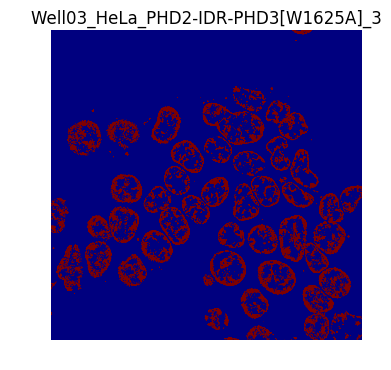

In [5]:
##Check the mask
plt.imshow(mask5[z])
plt.axis('off')
plt.title('Well03_HeLa_PHD2-IDR-PHD3[W1625A]_3')

In [9]:
import mahotas as mh
from skimage import morphology

##
def labelNuceli(mask, min_vol = 8000):
#By default min_vol = 8000
    
    labeled_mask, nr_objects=mh.label(mask)
    print('{} objects were detected.'.format(nr_objects))
    
    real=morphology.remove_small_objects(labeled_mask, min_vol)
    
    #Reset counts  and count the labels, 
    relabeled, n_left = mh.labeled.relabel(real)
    print('After filtering and relabeling, there are {} nuclei left.'.format(n_left))

    return relabeled

In [10]:
relabeled=labelNuceli(mask5)

346629 objects were detected.
After filtering and relabeling, there are 41 nuclei left.


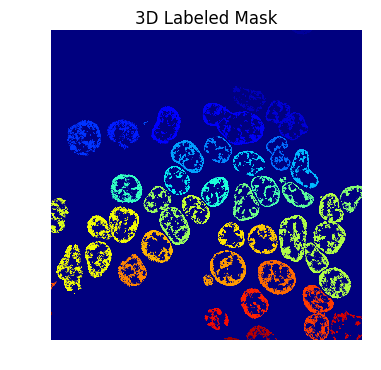

In [11]:
plt.imshow(relabeled[z])
plt.axis('off')
plt.title('3D Labeled Mask')

In [18]:
from scipy.ndimage import morphology

##Define the fillObjects (SLOW!) 
def fillObjects3D(labeled_mask):
    
    filled_mask=np.zeros_like(labeled_mask)
    for l in range(labeled_mask.max()):
        ll=l+1
        blob=morphology.binary_dilation(labeled_mask==ll, np.ones((3,20,20)))
        filled_blob=morphology.binary_fill_holes(blob)
        reduced=morphology.binary_erosion(filled_blob, np.ones((3,20,20)))*ll
        filled_mask=filled_mask+reduced

    return filled_mask

In [19]:
##Test fillObjects3D
mask7=fillObjects3D(relabeled)

In [12]:
from scipy.ndimage import morphology

##Define the fillObjects (Slow) 
def fillObjects(labeled_mask):
    
    #Let's do every z slice
    filled_mask=np.zeros_like(labeled_mask)
    for z, frame in enumerate(labeled_mask):

        #Could remove on boarders at this point?
        final=np.zeros_like(frame)

        for l in range(frame.max()):
            ll=l+1
            blob=morphology.binary_dilation(frame==ll, np.ones((20,20)))
            filled_blob=morphology.binary_fill_holes(blob)
            reduced=morphology.binary_erosion(filled_blob, np.ones((20,20)))*ll
            final=final+reduced

        filled_mask[z]=final
    return filled_mask

In [13]:
mask6=fillObjects(relabeled)

KeyboardInterrupt: 

(<matplotlib.axes._subplots.AxesSubplot at 0x671b9a58>,
 <matplotlib.text.Text at 0x623966a0>)

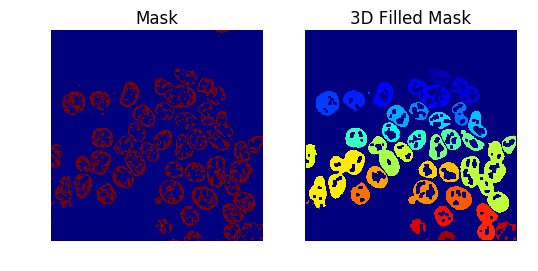

In [21]:
##Compare
plt.subplot(1,2,1),plt.imshow(mask5[z])
plt.subplot(1,2,1),plt.axis('off')
plt.subplot(1,2,1),plt.title('Mask')
plt.subplot(1,2,2),plt.imshow(mask7[z])
plt.subplot(1,2,2),plt.axis('off')
plt.subplot(1,2,2),plt.title('3D Filled Mask')

In [ ]:
##Could you watershed these as you go?

In [70]:
##Calculate distance transform
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from scipy import ndimage
distance3D = ndimage.distance_transform_edt(mask6)

distance_z4 = ndimage.distance_transform_edt(mask6[4])

(<matplotlib.axes._subplots.AxesSubplot at 0x10c8dbb70>,
 <matplotlib.text.Text at 0x10ce995c0>)

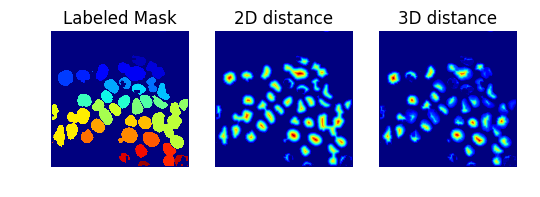

In [73]:
##Compare distance vs 3D distance transform
plt.subplot(1,3,1),plt.imshow(mask6[z])
plt.subplot(1,3,1),plt.axis('off')
plt.subplot(1,3,1),plt.title('Labeled Mask')
plt.subplot(1,3,2),plt.imshow(distance_z4)
plt.subplot(1,3,2),plt.axis('off')
plt.subplot(1,3,2),plt.title('2D distance')
plt.subplot(1,3,3),plt.imshow(distance3D[z])
plt.subplot(1,3,3),plt.axis('off')
plt.subplot(1,3,3),plt.title('3D distance')

##3D transform better resolves the gaps

In [76]:
#local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((1, 3, 3)), labels=mask6)
local_max1 = peak_local_max(distance_z4, indices=False)
local_max2 = peak_local_max(distance_z4, indices=False, labels=mask6[4])
local_max3 = peak_local_max(distance_z4, indices=False, threshold_abs=3, labels=mask6[4])
local_max4 = peak_local_max(distance_z4, indices=False, threshold_abs=3, footprint=np.ones((4, 4)), labels=mask6[4])

In [94]:
#local_max5 = peak_local_max(distance_z4, indices=False, threshold_abs=3, footprint=np.ones((50, 50)), labels=mask6[4]) #50,50 works
local_max6 = peak_local_max(distance_z4, indices=False, threshold_abs=3, footprint=np.ones((75, 75)), labels=mask6[4]) #50,50 works

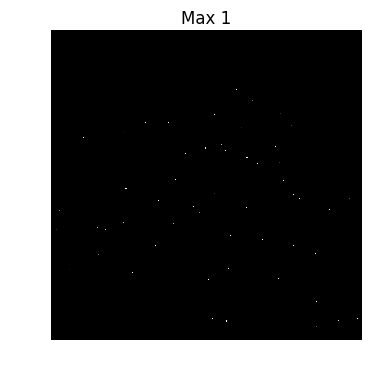

In [88]:
plt.imshow(morphology.binary_dilation(local_max5, np.ones((5,5))), cmap='gray')
plt.axis('off')
plt.title('Max 1')

(<matplotlib.axes._subplots.AxesSubplot at 0x17527d438>,
 <matplotlib.text.Text at 0x119701390>)

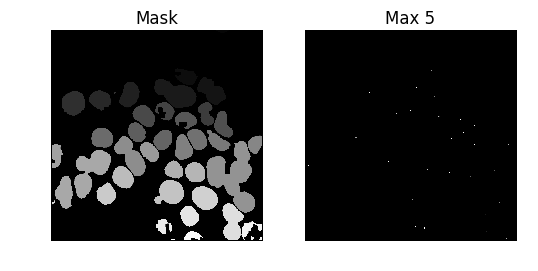

In [91]:
##Compare distance vs 3D distance transform
plt.subplot(1,2,1),plt.imshow(mask6[z], cmap='gray')
plt.subplot(1,2,1),plt.axis('off')
plt.subplot(1,2,1),plt.title('Mask')
plt.subplot(1,2,2),plt.imshow(morphology.binary_dilation(local_max5, np.ones((5,5))), cmap='gray')
plt.subplot(1,2,2),plt.axis('off')
plt.subplot(1,2,2),plt.title('Max 5')
# plt.subplot(1,4,3),plt.imshow(local_max3, cmap='gray')
# plt.subplot(1,4,3),plt.axis('off')
# plt.subplot(1,4,3),plt.title('Max 3')
# plt.subplot(1,4,4),plt.imshow(local_max4, cmap='gray')
# plt.subplot(1,4,4),plt.axis('off')
# plt.subplot(1,4,4),plt.title('Max 4')

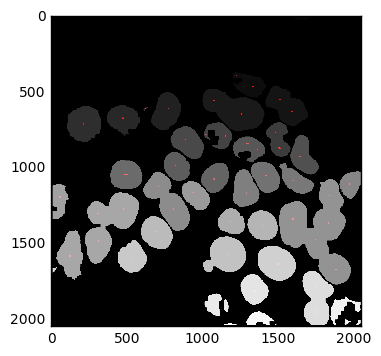

In [95]:
##Check local max using overlay
plt.imshow(mh.overlay(mask6[z], morphology.binary_dilation(local_max6, np.ones((9,9)))))

In [100]:
#Test 2D watershed
markers, n_max = mh.label(local_max6)
labels_ws = watershed(-distance_z4, markers, mask=mask6[z])

(<matplotlib.axes._subplots.AxesSubplot at 0x111ce7fd0>,
 <matplotlib.text.Text at 0x1840df048>)

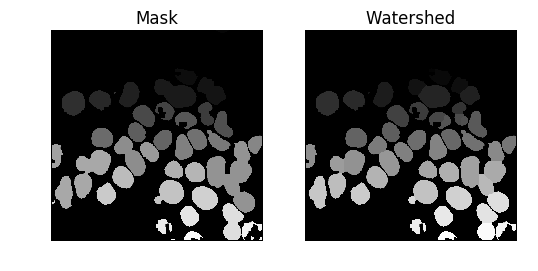

In [101]:
plt.subplot(1,2,1),plt.imshow(mask6[z], cmap='gray')
plt.subplot(1,2,1),plt.axis('off')
plt.subplot(1,2,1),plt.title('Mask')
plt.subplot(1,2,2),plt.imshow(labels_ws, cmap='gray')
plt.subplot(1,2,2),plt.axis('off')
plt.subplot(1,2,2),plt.title('Watershed')

##Watershed did improve 2D but may split some nuclei

In [103]:
##What about in 3D?
#Detect 2D maxima in a single plane of the 3D distance image
local_max7 = peak_local_max(distance3D[4], indices=False, threshold_abs=3, labels=mask6[4])

#Detect maxima in 3D space
local_max8 = peak_local_max(distance3D, indices=False, threshold_abs=3, labels=mask6)

In [108]:
#Now try the improved 2D settings
local_max9 = peak_local_max(distance3D, indices=False, threshold_abs=3, footprint=np.ones((1, 75, 75)), labels=mask6)

In [110]:
#Can you improve further?
local_max10 = peak_local_max(distance3D, indices=False, threshold_abs=5, footprint=np.ones((1, 100, 100)), labels=mask6)

In [159]:
#Perhaps 2D peak detection within 3D distance map is best
local_max11 = peak_local_max(distance3D[4], indices=False, threshold_abs=5, footprint=np.ones((100, 100)), labels=mask6[4])
#This give identical peaks to local max10

In [163]:
local_max10[4].all() == local_max11.all()

True

(<matplotlib.axes._subplots.AxesSubplot at 0x1cb413320>,
 <matplotlib.text.Text at 0x1d6871358>)

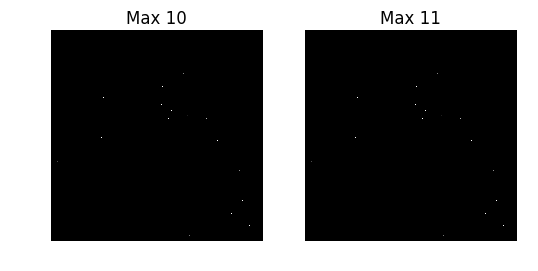

In [161]:
##Compare 2D vs 3D local maxima
plt.subplot(1,2,1),plt.imshow(morphology.binary_dilation(local_max10[4], np.ones((5,5))), cmap='gray')
plt.subplot(1,2,1),plt.axis('off')
plt.subplot(1,2,1),plt.title('Max 10')
plt.subplot(1,2,2),plt.imshow(morphology.binary_dilation(local_max11, np.ones((5,5))), cmap='gray')
plt.subplot(1,2,2),plt.axis('off')
plt.subplot(1,2,2),plt.title('Max 11')

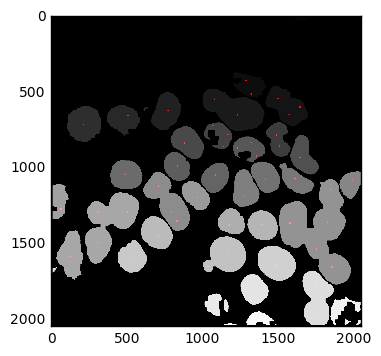

In [111]:
##Check local max using overlay
plt.imshow(mh.overlay(mask6[z], morphology.binary_dilation(local_max10[z], np.ones((9,9)))))

In [112]:
#Test 3D watershed in 2D
markers, n_max = mh.label(local_max10[4])
labels_ws2 = watershed(-distance3D[4], markers, mask=mask6[z])

(<matplotlib.axes._subplots.AxesSubplot at 0x193bfdbe0>,
 <matplotlib.text.Text at 0x193e01898>)

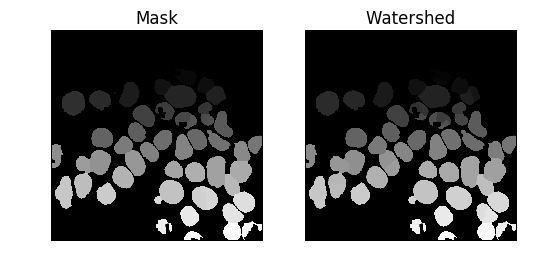

In [114]:
plt.subplot(1,2,1),plt.imshow(labels_ws, cmap='gray')
plt.subplot(1,2,1),plt.axis('off')
plt.subplot(1,2,1),plt.title('Mask')
plt.subplot(1,2,2),plt.imshow(labels_ws2, cmap='gray')
plt.subplot(1,2,2),plt.axis('off')
plt.subplot(1,2,2),plt.title('Watershed')

In [ ]:
##Increase the footprint even higher
local_max12 = peak_local_max(distance3D, indices=False, threshold_abs=7, footprint=np.ones((1, 175, 175)), labels=mask6)

In [ ]:
##Check local max using overlay
plt.imshow(mh.overlay(mask6[z], morphology.binary_dilation(local_max12[z], np.ones((9,9)))))

In [172]:
markers, n_max = mh.label(local_max12)

In [174]:
# ##Full 3D
# labels_ws3 = watershed(-distance3D, markers, mask=mask6)
# ##Full 3D sucks!!

In [183]:
for f in range(24):
    ws4[f] = watershed(-distance3D[f], markers[f], mask=mask6[f])

In [181]:
def watershed3D(mask, peaks, distance):

    labels=np.zeros_like(mask)
    
    #Calculate labels in 2D
    for f, frame in enumerate(mask):
            
        labels[f] = watershed(-distance[f], peaks[f], mask=mask[f])
        
    return labels

In [177]:
##Iterative Watershed
ws4 = watershed3D(distance=distance3D, mask=mask6, peaks=local_max12)

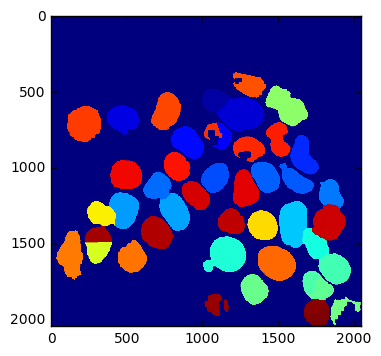

In [184]:
plt.imshow(ws4[4])
#plt.imshow(watershed(-distance3D[4], markers[4], mask=mask6[4]))
#plt.imshow(watershed3D(distance=-distance3D[4], peaks=markers[4], mask=mask6[4]))

In [193]:
##How do you separate distinct labels.
from scipy.ndimage import morphology

##Define the fillObjects 
def splitWatershed(watershed_labels):
    
    ##Add conditional to only separate objects within the right parameters
    
    #Let's do every z slice
    split=np.zeros_like(watershed_labels)
    for z, frame in enumerate(watershed_labels):

        #Could remove on boarders at this point?
        final=np.zeros_like(frame)

        for l in range(frame.max()):
            ll=l+1
            shrunk=morphology.binary_erosion(frame==ll)*ll
            final=final+shrunk
    split[z]=final
    return split

In [200]:
#Try the first 3 frames
split=splitWatershed(ws4)

KeyboardInterrupt: 

In [206]:
from skimage.morphology import disk

radius = 3
selem = disk(radius)

final=np.zeros_like(ws4[4])

for l in range(ws4[4].max()):
    ll=l+1
    shrunk=morphology.binary_erosion(ws4[4]==ll, selem)*ll
    final=final+shrunk

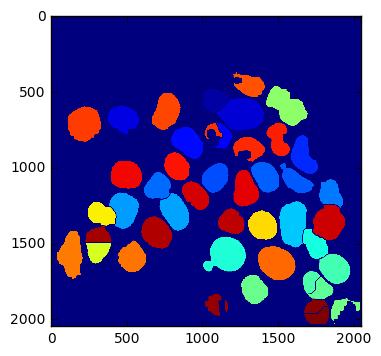

In [207]:
plt.imshow(final)

In [202]:
split=np.zeros_like(ws4)
    for z, frame in enumerate(ws4):

        #Could remove on boarders at this point?
        final=np.zeros_like(frame)

        for l in range(frame.max()):
            ll=l+1
            shrunk=morphology.binary_erosion(frame==ll)*ll
            final=final+shrunk
    split[z]=final

(<matplotlib.axes._subplots.AxesSubplot at 0x1b1938160>,
 <matplotlib.text.Text at 0x1b1c0f780>)

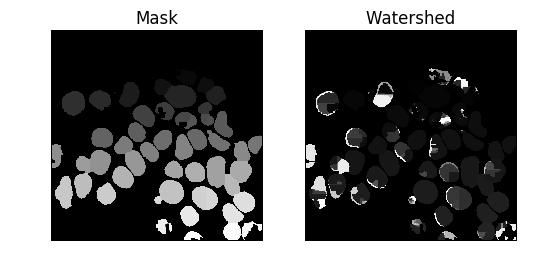

In [117]:
plt.subplot(1,2,1),plt.imshow(labels_ws, cmap='gray')
plt.subplot(1,2,1),plt.axis('off')
plt.subplot(1,2,1),plt.title('Mask')
plt.subplot(1,2,2),plt.imshow(labels_ws3[4], cmap='gray')
plt.subplot(1,2,2),plt.axis('off')
plt.subplot(1,2,2),plt.title('Watershed')

In [68]:
from scipy.ndimage import morphology

##Define the fillObjects 
def fillAndWatershedObjects(labeled_mask):
    
    #Let's do every z slice
    filled_mask=np.zeros_like(labeled_mask)
    for z, frame in enumerate(labeled_mask):

        #Could remove on boarders at this point?
        final=np.zeros_like(frame)

        for l in range(frame.max()):
            ll=l+1
            blob=morphology.binary_dilation(frame==ll, np.ones((20,20)))
            filled_blob=morphology.binary_fill_holes(blob)
            
            ##Don't pass labels forward
            reduced=morphology.binary_erosion(filled_blob, np.ones((20,20)))
            final=final+reduced
        
        #In this script filled mask is binary
        filled_mask[z]=final
        
    #3D Watershed
    split_mask=ws(filled_mask)
        
    return split_mask

(<matplotlib.axes._subplots.AxesSubplot at 0x12a237c88>,
 <matplotlib.text.Text at 0x12a7cad68>)

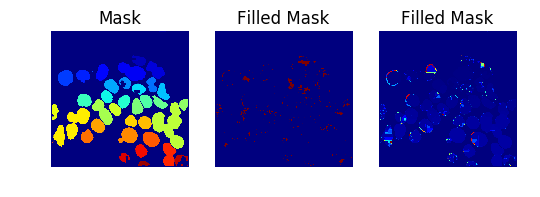

In [29]:
##Compare
plt.subplot(1,3,1),plt.imshow(mask6[z])
plt.subplot(1,3,1),plt.axis('off')
plt.subplot(1,3,1),plt.title('Mask')
plt.subplot(1,3,2),plt.imshow(local_maxi[z])
plt.subplot(1,3,2),plt.axis('off')
plt.subplot(1,3,2),plt.title('Filled Mask')
plt.subplot(1,3,3),plt.imshow(labels_ws[z])
plt.subplot(1,3,3),plt.axis('off')
plt.subplot(1,3,3),plt.title('Filled Mask')

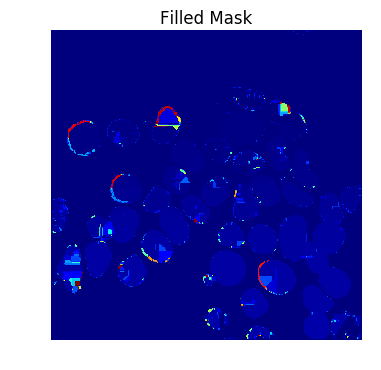

In [27]:
#What?
plt.imshow(labels_ws[z])
plt.axis('off')
plt.title('Filled Mask')

In [67]:
def ws(mask):
    
    from skimage.morphology import watershed
    from skimage.feature import peak_local_max
    from scipy import ndimage

    #This bit is simple
    distance = ndimage.distance_transform_edt(mask)

    #This bit is the challenge   
    local_maxi = peak_local_max(distance, 
                                indices=False,
                                footprint=np.ones((1, 25, 25)),
                                threshold_abs=3,
                                num_peaks=80, 
                                labels=mask)
    
    #Find the centers
    markers = morphology.label(local_maxi)
    
    #Watershed image
    labels_ws = watershed(-distance, markers, mask=mask6)
    
    return labels_ws

In [34]:
new_mask = ws(mask6)

(<matplotlib.axes._subplots.AxesSubplot at 0x12acf1a20>,
 <matplotlib.text.Text at 0xa125b198>)

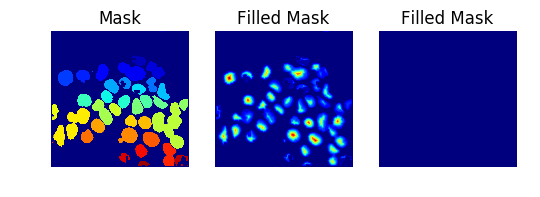

In [37]:
plt.subplot(1,3,1),plt.imshow(mask6[z])
plt.subplot(1,3,1),plt.axis('off')
plt.subplot(1,3,1),plt.title('Mask')
plt.subplot(1,3,2),plt.imshow(distance[z])
plt.subplot(1,3,2),plt.axis('off')
plt.subplot(1,3,2),plt.title('Distance Transform')
plt.subplot(1,3,3),plt.imshow(new_mask[z])
plt.subplot(1,3,3),plt.axis('off')
plt.subplot(1,3,3),plt.title('Filled Mask')

In [59]:
#This bit is the challenge, optimise the footprint

local_maxi_11 = peak_local_max(distance, 
                               threshold_abs=3, #Peak pixels must be more than 3 pixels from the background
                               indices=False, 
                               footprint=np.ones((1, 11, 11)), #A difficult parameter to set
                               labels=mask6,  #I think this will prevent peaks outside of labels
                               num_peaks=80)  #set this to double the number of objects.

#local_maxi_11 = peak_local_max(distance, indices=False, footprint=np.ones((1, 11, 11)), labels=mask6)

(<matplotlib.axes._subplots.AxesSubplot at 0xd4412630>,
 <matplotlib.text.Text at 0xe8ba1400>)

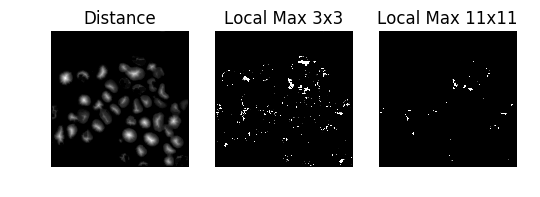

In [61]:
#How appropriate is the local max detection
plt.subplot(1,3,1),plt.imshow(distance[z], cmap='gray')
plt.subplot(1,3,1),plt.axis('off')
plt.subplot(1,3,1),plt.title('Distance')
plt.subplot(1,3,2),plt.imshow(local_maxi[z], cmap='gray')
plt.subplot(1,3,2),plt.axis('off')
plt.subplot(1,3,2),plt.title('Local Max 3x3')
plt.subplot(1,3,3),plt.imshow(local_maxi_11[z], cmap='gray')
plt.subplot(1,3,3),plt.axis('off')
plt.subplot(1,3,3),plt.title('Local Max 11x11')

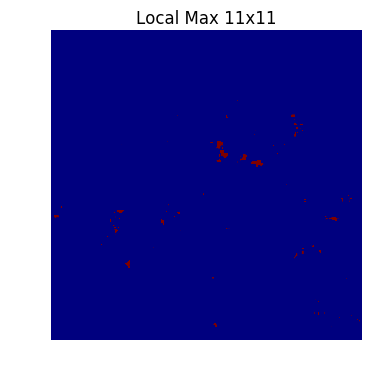

In [62]:
plt.imshow(local_maxi_11[z])
plt.axis('off')
plt.title('Local Max 11x11')

In [65]:
#Find the centers
markers = morphology.label(local_maxi_11)

#Watershed image
labels_ws = watershed(-distance, markers, mask=mask6)

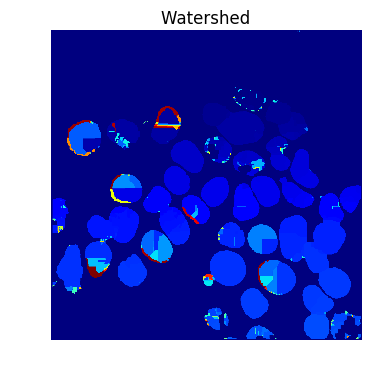

In [66]:
plt.imshow(labels_ws[z])
plt.axis('off')
plt.title('Watershed')

In [69]:
splitMask=fillAndWatershedObjects(mask6)

AttributeError: 'module' object has no attribute 'label'

In [ ]:
plt.imshow(splitMask[z])
plt.axis('off')
plt.title('Watershed')